#### [ 대구지하철 호선도에 따른 정보들 파헤치기 - Matplotlib ]
- 데이터셋 : 대구교통공사 - 공공데이터들
    - 1) 연도별 승차인원 (1997년~), 연도별 하차인원 (2006년~), (국가철도공단_대구교통공사_호선구성역정보)
        - 역별 승차,하차 인원 총원 변화 추세도
        - 2019년 ~ 2024년 호선별 가장 많이 타고 (승차) 내리는 곳 (하차) (TOP5)
    - 2) 역세권 데이터 --> 실제로 유동인구와 역세권 데이터가 부합하는지 확인

- 과정
    * 데이터파일 확인 
        - 첫번째 줄이 컬럼명 맞는지 확인 
        - 불필요한 컬럼이나 행이 있는지 확인
        - 결측치 정도 확인
    * 데이터 전처리 : 데이터 정리 및 손질 
        - 파일 확인 후 체크한 사항 진행 
        - 결측치 처리
        - 이상치 처리
        - 중복데이터 처리
        - 형변환 => 실제 데이터와 타입 일치 
    * 데이터 가공 : 분석하고자하는 데이터 형태 
        - 행인덱스 처리 : 멀티인덱스/컬럼=>행인덱스/행인덱스 초기화 
        - 필요한 컬럼 & 행 추출 
        - 추가적인 결측치/이상치/중복데이터 처리 
        - 형변환 => 연속 -> 범주형, 범주형 -> 연속형
    * 데이터 분석 
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리

* 사용 데이터
    - 대구교통공사_월별하차인원_20240531.csv
    - 대구교통공사_대구도시철도 역세권정보_20240430.csv

In [4]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 데이터 로드
rawDF = pd.read_csv(r'C:\Users\KDP-50\OneDrive\바탕 화면\PANDAS06\work(project02)\대구교통공사_월별하차인원_20240531.csv',
                    encoding='cp949')
rawDF

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
0,2006,1,0,0,162387,122175,98250,306463,116039,117152,...,0,0,0,0,0,0,0,0,0,0
1,2006,2,0,0,167676,124945,100549,321823,120394,120687,...,0,0,0,0,0,0,0,0,0,0
2,2006,3,0,0,206452,141658,117971,373093,163141,143060,...,0,0,0,0,0,0,0,0,0,0
3,2006,4,0,0,203337,135264,114652,357166,149190,138231,...,0,0,0,0,0,0,0,0,0,0
4,2006,5,0,0,211751,141466,121653,381829,147146,142701,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2024,1,117837,113178,124272,227777,124202,312035,118131,104111,...,45414,82438,84829,49165,32287,83732,69688,61238,106580,67235
217,2024,2,111467,98717,116013,213138,115700,293237,109131,97778,...,42681,72443,75346,44402,29256,77510,64867,56647,97882,61003
218,2024,3,132814,122288,132768,243287,133226,334854,129690,108307,...,48628,85041,86515,52103,34565,89392,82175,66774,112198,69482
219,2024,4,131188,121285,131212,238101,130590,324909,129359,106754,...,49157,86047,84920,52595,35999,88943,89598,66360,113976,69808


In [6]:
rawDF.head()

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
0,2006,1,0,0,162387,122175,98250,306463,116039,117152,...,0,0,0,0,0,0,0,0,0,0
1,2006,2,0,0,167676,124945,100549,321823,120394,120687,...,0,0,0,0,0,0,0,0,0,0
2,2006,3,0,0,206452,141658,117971,373093,163141,143060,...,0,0,0,0,0,0,0,0,0,0
3,2006,4,0,0,203337,135264,114652,357166,149190,138231,...,0,0,0,0,0,0,0,0,0,0
4,2006,5,0,0,211751,141466,121653,381829,147146,142701,...,0,0,0,0,0,0,0,0,0,0


In [7]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 93 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   년        221 non-null    int64
 1   월        221 non-null    int64
 2   설화명곡     221 non-null    int64
 3   화원       221 non-null    int64
 4   대곡       221 non-null    int64
 5   진천       221 non-null    int64
 6   월배       221 non-null    int64
 7   상인       221 non-null    int64
 8   월촌       221 non-null    int64
 9   송현       221 non-null    int64
 10  서부정류장    221 non-null    int64
 11  대명       221 non-null    int64
 12  안지랑      221 non-null    int64
 13  현충로      221 non-null    int64
 14  영대병원     221 non-null    int64
 15  교대       221 non-null    int64
 16  명덕1      221 non-null    int64
 17  반월당1     221 non-null    int64
 18  중앙로      221 non-null    int64
 19  대구역      221 non-null    int64
 20  칠성시장     221 non-null    int64
 21  신천       221 non-null    int64
 22  동대구역     221 non-null    i

In [8]:
# 모든 칼럼에 대해 결측치 없음 --> 결측치 처리 할 필요 X

In [9]:
rawDF.describe()

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,2014.714932,6.420814,47081.289593,45477.221719,204250.524887,180328.533937,122932.950226,359809.235294,134547.787330,119639.628959,...,19107.466063,42387.791855,38133.696833,26457.746606,17208.941176,43327.239819,38037.837104,31551.918552,56002.285068,31948.475113
std,5.332167,3.466636,56450.727111,54417.743529,46871.508300,37636.602444,13156.202852,48676.235983,19609.093147,13704.564257,...,19840.105909,44064.710732,39294.071323,27441.059497,17940.281565,44694.478819,39693.206423,32678.389333,57594.715052,32809.936684
min,2006.000000,1.000000,0.000000,0.000000,66332.000000,74582.000000,47668.000000,121209.000000,51409.000000,49220.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,3.000000,0.000000,0.000000,177244.000000,141793.000000,116186.000000,332458.000000,122114.000000,110916.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,6.000000,0.000000,0.000000,211675.000000,184684.000000,122848.000000,369446.000000,133335.000000,124057.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,9.000000,111231.000000,105405.000000,240234.000000,213138.000000,130472.000000,395673.000000,149402.000000,129391.000000,...,39806.000000,85041.000000,79242.000000,52595.000000,35347.000000,88645.000000,77642.000000,64225.000000,113670.000000,66140.000000
max,2024.000000,12.000000,136185.000000,132984.000000,293582.000000,252154.000000,152946.000000,436270.000000,169329.000000,143060.000000,...,49422.000000,109511.000000,95757.000000,66424.000000,50792.000000,109035.000000,146709.000000,80099.000000,138964.000000,90846.000000


In [10]:
rawDF.dtypes

년       int64
월       int64
설화명곡    int64
화원      int64
대곡      int64
        ...  
황금      int64
수성못     int64
지산      int64
범물      int64
용지      int64
Length: 93, dtype: object

### 데이터 전처리
- 1월-12월 데이터 보유 년도 데이터만 남기기 -> 2024년 데이터 행 삭제
- 연도별 역별 하차인원 DF을 구하기 위해 1월 -12월 데이터 행 합쳐서 '총합' 칼럼 "년" 옆에 생성

##### 1월-12월 데이터 보유 년도 데이터만 남기기 -> 2024년 데이터 행 삭제

In [11]:
rawDF.tail(10)

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
211,2023,8,116615,109567,117305,216734,118021,302159,116845,101856,...,42685,76205,78155,44869,31394,79837,66389,58220,108740,65612
212,2023,9,117856,114297,122200,223374,120140,307473,120073,100133,...,44691,79654,80645,47941,32760,81662,85079,60077,108199,65297
213,2023,10,124405,120537,131743,237009,127680,328372,125688,106033,...,47605,84266,84468,51137,36064,87633,85150,64938,113670,69823
214,2023,11,123916,119246,131546,236502,128482,325368,126972,105379,...,47414,82378,84820,50972,35615,87280,73471,64111,112583,68809
215,2023,12,123361,116070,127658,237974,128130,331320,126621,104771,...,47845,83463,83438,51166,35069,86116,80008,62710,109467,67135
216,2024,1,117837,113178,124272,227777,124202,312035,118131,104111,...,45414,82438,84829,49165,32287,83732,69688,61238,106580,67235
217,2024,2,111467,98717,116013,213138,115700,293237,109131,97778,...,42681,72443,75346,44402,29256,77510,64867,56647,97882,61003
218,2024,3,132814,122288,132768,243287,133226,334854,129690,108307,...,48628,85041,86515,52103,34565,89392,82175,66774,112198,69482
219,2024,4,131188,121285,131212,238101,130590,324909,129359,106754,...,49157,86047,84920,52595,35999,88943,89598,66360,113976,69808
220,2024,5,136185,125477,136473,252154,137640,342382,133388,110625,...,49422,87600,86813,53389,37352,92353,83197,67626,117495,71447


In [12]:
# 2024년 행 데이터 삭제
rawDF.drop(index=rawDF.index[-5:], inplace=True)
rawDF.tail(10)

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
206,2023,3,128914,126770,134771,247998,136136,350991,135355,112463,...,48338,84038,85090,54313,35627,95183,88586,64225,120293,73209
207,2023,4,121800,119156,128891,235342,128391,329029,131501,106812,...,48201,81901,81233,51178,35932,90315,83328,61472,115292,70354
208,2023,5,126760,122824,133878,243716,136832,343265,133335,110916,...,48783,83045,81748,52095,36449,91349,80423,63887,117688,70389
209,2023,6,122728,116419,127605,229366,128757,323126,128150,106433,...,47345,82738,81305,50443,35524,88089,79838,63066,112235,69123
210,2023,7,118889,111276,122753,222969,122978,311665,121229,104382,...,44414,79763,79339,46827,33191,83252,68288,59896,111095,66843
211,2023,8,116615,109567,117305,216734,118021,302159,116845,101856,...,42685,76205,78155,44869,31394,79837,66389,58220,108740,65612
212,2023,9,117856,114297,122200,223374,120140,307473,120073,100133,...,44691,79654,80645,47941,32760,81662,85079,60077,108199,65297
213,2023,10,124405,120537,131743,237009,127680,328372,125688,106033,...,47605,84266,84468,51137,36064,87633,85150,64938,113670,69823
214,2023,11,123916,119246,131546,236502,128482,325368,126972,105379,...,47414,82378,84820,50972,35615,87280,73471,64111,112583,68809
215,2023,12,123361,116070,127658,237974,128130,331320,126621,104771,...,47845,83463,83438,51166,35069,86116,80008,62710,109467,67135


##### 연도별 역별 총합 하차인원 DF
- 1월 -12월 데이터 행 합쳐서 '총합' 칼럼 "년" 옆에 생성

In [13]:
year_group_Df = rawDF.groupby("년")
year_group_Df.get_group(2006)

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
0,2006,1,0,0,162387,122175,98250,306463,116039,117152,...,0,0,0,0,0,0,0,0,0,0
1,2006,2,0,0,167676,124945,100549,321823,120394,120687,...,0,0,0,0,0,0,0,0,0,0
2,2006,3,0,0,206452,141658,117971,373093,163141,143060,...,0,0,0,0,0,0,0,0,0,0
3,2006,4,0,0,203337,135264,114652,357166,149190,138231,...,0,0,0,0,0,0,0,0,0,0
4,2006,5,0,0,211751,141466,121653,381829,147146,142701,...,0,0,0,0,0,0,0,0,0,0
5,2006,6,0,0,189988,128669,109871,344053,132965,131208,...,0,0,0,0,0,0,0,0,0,0
6,2006,7,0,0,183678,127538,107286,337378,121405,132418,...,0,0,0,0,0,0,0,0,0,0
7,2006,8,0,0,184921,131025,108295,333188,119879,129558,...,0,0,0,0,0,0,0,0,0,0
8,2006,9,0,0,190419,132413,117805,343794,135577,134998,...,0,0,0,0,0,0,0,0,0,0
9,2006,10,0,0,189323,131045,116128,332843,125674,126429,...,0,0,0,0,0,0,0,0,0,0


In [14]:
sum_year = dict(zip( rawDF["년"].unique().tolist(), [0]*len(rawDF["년"].unique()) ) )
sum_year

{2006: 0,
 2007: 0,
 2008: 0,
 2009: 0,
 2010: 0,
 2011: 0,
 2012: 0,
 2013: 0,
 2014: 0,
 2015: 0,
 2016: 0,
 2017: 0,
 2018: 0,
 2019: 0,
 2020: 0,
 2021: 0,
 2022: 0,
 2023: 0}

In [15]:
sum_year = dict(zip( rawDF["년"].unique().tolist(), [0]*len(rawDF["년"].unique()) ) ) 

for year in rawDF["년"].unique():
    sum_year[year] = year_group_Df.get_group(year).sum()[2:].tolist()

# sum_year

In [16]:
# 연도별 역별 하차인원 총합 DF 생성

year_out_DF = pd.DataFrame( sum_year, index=rawDF.columns[2:])
year_out_DF_final = year_out_DF.T.copy()

In [17]:
year_out_DF_final.head()

,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,서부정류장,대명,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
2006,0,0,2281143,1582727,1349384,4116828,1588371,1573900,3815431,1168064,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,2465713,1547586,1436929,4067234,1447541,1479131,3587521,1123919,...,0,0,0,0,0,0,0,0,0,0
2008,0,0,2773489,1586943,1424722,4246640,1413141,1506228,3547117,1125631,...,0,0,0,0,0,0,0,0,0,0
2009,0,0,2665873,1650061,1409125,4230009,1370744,1513779,3456724,1099017,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,2682135,1728905,1401545,4307647,1524297,1490567,3440455,1062094,...,0,0,0,0,0,0,0,0,0,0


In [18]:
first_line = year_out_DF_final.loc[:,'설화명곡':'안심']
second_line = year_out_DF_final.loc[:, '문양':'영남대']
third_line = year_out_DF_final.loc[:, '칠곡경대병원':'용지']

In [19]:
first_line

,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,서부정류장,대명,...,아양교,동촌,해안,방촌,용계,율하,신기,반야월,각산,안심
2006,0,0,2281143,1582727,1349384,4116828,1588371,1573900,3815431,1168064,...,1828031,591464,1094105,1201283,576655,445903,1231694,905698,1354935,1676196
2007,0,0,2465713,1547586,1436929,4067234,1447541,1479131,3587521,1123919,...,1861635,539202,1066301,1129764,579297,429181,1152810,925874,1354156,1787132
2008,0,0,2773489,1586943,1424722,4246640,1413141,1506228,3547117,1125631,...,1875219,529693,1077972,1103070,582321,450290,1174887,963067,1416594,1919978
2009,0,0,2665873,1650061,1409125,4230009,1370744,1513779,3456724,1099017,...,1879293,524635,1032562,1072365,598439,643104,1206475,914265,1349085,1999623
2010,0,0,2682135,1728905,1401545,4307647,1524297,1490567,3440455,1062094,...,1967905,530714,1011319,1072249,625729,1043487,1325812,915855,1377314,2127512
2011,0,0,2802528,1909004,1443530,4592981,1694722,1533770,3482533,1215257,...,2029255,542586,1004162,1194816,632055,1392827,1450514,946250,1414568,2237591
2012,0,0,2867615,2085445,1458735,4728331,1741014,1527339,3486241,1320682,...,2074648,550066,1002389,1246623,638520,1542614,1465891,893370,1446247,2356738
2013,0,0,3052262,2283953,1517167,4775371,1775446,1541743,3595806,1393995,...,2123897,576638,1054134,1237581,650022,1626667,1472887,791357,1446743,2409077
2014,0,0,3048716,2360686,1513165,4687037,1743539,1485766,3615729,1430419,...,2116911,619163,1087895,1244168,630720,1712260,1473514,788099,1510190,2458177
2015,0,0,3096735,2525773,1560232,4764510,1795786,1484263,3628271,1474398,...,2072536,679314,1070567,1258274,681992,1738613,1445736,811941,1522522,2452409


In [20]:
len(first_line.index)

18

In [21]:
first_line.index[0]

2006

In [22]:
first_line.loc[first_line.index[0]]

설화명곡           0
화원             0
대곡       2281143
진천       1582727
월배       1349384
상인       4116828
월촌       1588371
송현       1573900
서부정류장    3815431
대명       1168064
안지랑      1472134
현충로      1251927
영대병원     2517603
교대       1722564
명덕1      2345863
반월당1     3177503
중앙로      8483523
대구역      4256762
칠성시장     2086015
신천       1826453
동대구역     4628469
동구청      1757360
아양교      1828031
동촌        591464
해안       1094105
방촌       1201283
용계        576655
율하        445903
신기       1231694
반야월       905698
각산       1354935
안심       1676196
Name: 2006, dtype: int64

In [23]:
first_line_year_total=[]
for i in range(len(first_line.index)):
    first_line_year_total.append(first_line.loc[first_line.index[i]].sum())
first_line_year_total

[63907988,
 61805150,
 62638635,
 61943594,
 63179072,
 66524054,
 68035710,
 69454549,
 69205305,
 69206531,
 71097687,
 73640811,
 73643476,
 75380590,
 48629447,
 53284335,
 57618984,
 61383999]

In [24]:
first_line['연도별 합계'] = first_line_year_total

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_19724\1224822141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_line['연도별 합계'] = first_line_year_total


In [25]:
first_line

,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,서부정류장,대명,...,동촌,해안,방촌,용계,율하,신기,반야월,각산,안심,연도별 합계
2006,0,0,2281143,1582727,1349384,4116828,1588371,1573900,3815431,1168064,...,591464,1094105,1201283,576655,445903,1231694,905698,1354935,1676196,63907988
2007,0,0,2465713,1547586,1436929,4067234,1447541,1479131,3587521,1123919,...,539202,1066301,1129764,579297,429181,1152810,925874,1354156,1787132,61805150
2008,0,0,2773489,1586943,1424722,4246640,1413141,1506228,3547117,1125631,...,529693,1077972,1103070,582321,450290,1174887,963067,1416594,1919978,62638635
2009,0,0,2665873,1650061,1409125,4230009,1370744,1513779,3456724,1099017,...,524635,1032562,1072365,598439,643104,1206475,914265,1349085,1999623,61943594
2010,0,0,2682135,1728905,1401545,4307647,1524297,1490567,3440455,1062094,...,530714,1011319,1072249,625729,1043487,1325812,915855,1377314,2127512,63179072
2011,0,0,2802528,1909004,1443530,4592981,1694722,1533770,3482533,1215257,...,542586,1004162,1194816,632055,1392827,1450514,946250,1414568,2237591,66524054
2012,0,0,2867615,2085445,1458735,4728331,1741014,1527339,3486241,1320682,...,550066,1002389,1246623,638520,1542614,1465891,893370,1446247,2356738,68035710
2013,0,0,3052262,2283953,1517167,4775371,1775446,1541743,3595806,1393995,...,576638,1054134,1237581,650022,1626667,1472887,791357,1446743,2409077,69454549
2014,0,0,3048716,2360686,1513165,4687037,1743539,1485766,3615729,1430419,...,619163,1087895,1244168,630720,1712260,1473514,788099,1510190,2458177,69205305
2015,0,0,3096735,2525773,1560232,4764510,1795786,1484263,3628271,1474398,...,679314,1070567,1258274,681992,1738613,1445736,811941,1522522,2452409,69206531


In [26]:
second_line

,문양,다사,대실,강창,계명대,성서산업단지,이곡,용산,죽전,감삼,...,만촌,담티,연호,대공원,고산,신매,사월,정평,임당,영남대
2006,714256,479071,431409,1311104,2569597,2046135,1434669,2711653,1680043,2032690,...,1282920,938415,140297,149190,749536,2616171,1956580,0,0,0
2007,748559,609371,480067,1406013,2560816,2086728,1382099,2762126,1670337,2157690,...,1372349,1006679,150784,181594,738945,2647971,2240735,0,0,0
2008,843485,600428,753350,1499394,2686437,2097263,1411304,2873779,1722626,2225724,...,1420144,1038045,171260,195814,801843,2597179,2623742,0,0,0
2009,854798,652987,1328450,1526047,2707690,2067932,1394957,2913282,1740792,2361482,...,1444657,1079509,170169,182204,839322,2462016,2958782,0,0,0
2010,891432,760130,1449457,1638789,2877237,2151160,1407128,3076591,1745262,2413856,...,1487281,1102825,166705,181954,862092,2434252,3108599,0,0,0
2011,969754,772528,1595523,1718339,2939182,2208514,1455236,3219414,1856343,2414378,...,1612608,1143372,181480,227746,963364,2515702,3308712,0,0,0
2012,1023005,793311,1881728,1706728,3066350,2157130,1479357,3288234,1992247,2485621,...,1691041,1230730,203312,245972,934129,2647352,2862695,388221,167335,1030158
2013,1090867,806471,2037206,1750499,3098930,2197122,1488088,3319177,2056978,2512991,...,1808412,1328467,228335,232679,981573,2842972,1712856,1456349,691529,3528143
2014,1090063,820421,2107361,1713642,3116387,2141501,1492337,3260877,2066000,2501305,...,1751764,1278048,240326,179256,958423,2811760,1624752,1532108,776090,3659440
2015,1067404,804379,2173585,1668354,3022538,2183132,1505973,3265445,2129395,2542477,...,1659743,1253737,230624,177857,915918,2773374,1617944,1517006,901034,3615663


In [27]:
second_line_year_total=[]
for i in range(len(second_line.index)):
    second_line_year_total.append(second_line.loc[second_line.index[i]].sum())
second_line_year_total

[43808439,
 45286999,
 47431446,
 49433405,
 51497831,
 54177946,
 57798909,
 63690252,
 63820918,
 63073340,
 63593000,
 61447527,
 60814072,
 62752832,
 41154306,
 46159741,
 51065974,
 54543666]

In [28]:
second_line['연도별 합계'] = second_line_year_total

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_19724\3038597112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_line['연도별 합계'] = second_line_year_total


In [29]:
third_line

,칠곡경대병원,학정,팔거,동천,칠곡운암,구암,태전,매천,매천시장,팔달,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015,359041,84219,1061456,469117,900593,539013,529499,461961,201049,241091,...,298457,755472,551948,452840,331021,710787,815430,548188,917238,572935


In [30]:
third_line_year_total=[]
for i in range(len(third_line.index)):
    third_line_year_total.append(third_line.loc[third_line.index[i]].sum())
third_line_year_total

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17084977,
 26853708,
 26814900,
 27032235,
 27946532,
 19611844,
 21671049,
 23353908,
 24828532]

In [31]:
third_line['연도별 합계'] = third_line_year_total

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_19724\1818818117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_line['연도별 합계'] = third_line_year_total


In [32]:
second_line

,문양,다사,대실,강창,계명대,성서산업단지,이곡,용산,죽전,감삼,...,담티,연호,대공원,고산,신매,사월,정평,임당,영남대,연도별 합계
2006,714256,479071,431409,1311104,2569597,2046135,1434669,2711653,1680043,2032690,...,938415,140297,149190,749536,2616171,1956580,0,0,0,43808439
2007,748559,609371,480067,1406013,2560816,2086728,1382099,2762126,1670337,2157690,...,1006679,150784,181594,738945,2647971,2240735,0,0,0,45286999
2008,843485,600428,753350,1499394,2686437,2097263,1411304,2873779,1722626,2225724,...,1038045,171260,195814,801843,2597179,2623742,0,0,0,47431446
2009,854798,652987,1328450,1526047,2707690,2067932,1394957,2913282,1740792,2361482,...,1079509,170169,182204,839322,2462016,2958782,0,0,0,49433405
2010,891432,760130,1449457,1638789,2877237,2151160,1407128,3076591,1745262,2413856,...,1102825,166705,181954,862092,2434252,3108599,0,0,0,51497831
2011,969754,772528,1595523,1718339,2939182,2208514,1455236,3219414,1856343,2414378,...,1143372,181480,227746,963364,2515702,3308712,0,0,0,54177946
2012,1023005,793311,1881728,1706728,3066350,2157130,1479357,3288234,1992247,2485621,...,1230730,203312,245972,934129,2647352,2862695,388221,167335,1030158,57798909
2013,1090867,806471,2037206,1750499,3098930,2197122,1488088,3319177,2056978,2512991,...,1328467,228335,232679,981573,2842972,1712856,1456349,691529,3528143,63690252
2014,1090063,820421,2107361,1713642,3116387,2141501,1492337,3260877,2066000,2501305,...,1278048,240326,179256,958423,2811760,1624752,1532108,776090,3659440,63820918
2015,1067404,804379,2173585,1668354,3022538,2183132,1505973,3265445,2129395,2542477,...,1253737,230624,177857,915918,2773374,1617944,1517006,901034,3615663,63073340


In [33]:
third_line

,칠곡경대병원,학정,팔거,동천,칠곡운암,구암,태전,매천,매천시장,팔달,...,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지,연도별 합계
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015,359041,84219,1061456,469117,900593,539013,529499,461961,201049,241091,...,755472,551948,452840,331021,710787,815430,548188,917238,572935,17084977


In [34]:
first_line

,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,서부정류장,대명,...,동촌,해안,방촌,용계,율하,신기,반야월,각산,안심,연도별 합계
2006,0,0,2281143,1582727,1349384,4116828,1588371,1573900,3815431,1168064,...,591464,1094105,1201283,576655,445903,1231694,905698,1354935,1676196,63907988
2007,0,0,2465713,1547586,1436929,4067234,1447541,1479131,3587521,1123919,...,539202,1066301,1129764,579297,429181,1152810,925874,1354156,1787132,61805150
2008,0,0,2773489,1586943,1424722,4246640,1413141,1506228,3547117,1125631,...,529693,1077972,1103070,582321,450290,1174887,963067,1416594,1919978,62638635
2009,0,0,2665873,1650061,1409125,4230009,1370744,1513779,3456724,1099017,...,524635,1032562,1072365,598439,643104,1206475,914265,1349085,1999623,61943594
2010,0,0,2682135,1728905,1401545,4307647,1524297,1490567,3440455,1062094,...,530714,1011319,1072249,625729,1043487,1325812,915855,1377314,2127512,63179072
2011,0,0,2802528,1909004,1443530,4592981,1694722,1533770,3482533,1215257,...,542586,1004162,1194816,632055,1392827,1450514,946250,1414568,2237591,66524054
2012,0,0,2867615,2085445,1458735,4728331,1741014,1527339,3486241,1320682,...,550066,1002389,1246623,638520,1542614,1465891,893370,1446247,2356738,68035710
2013,0,0,3052262,2283953,1517167,4775371,1775446,1541743,3595806,1393995,...,576638,1054134,1237581,650022,1626667,1472887,791357,1446743,2409077,69454549
2014,0,0,3048716,2360686,1513165,4687037,1743539,1485766,3615729,1430419,...,619163,1087895,1244168,630720,1712260,1473514,788099,1510190,2458177,69205305
2015,0,0,3096735,2525773,1560232,4764510,1795786,1484263,3628271,1474398,...,679314,1070567,1258274,681992,1738613,1445736,811941,1522522,2452409,69206531


- (2) 주변시설 (역주변), 역세권 데이터 --> 실제로 유동인구와 역세권 데이터가 부합하는지 확인

In [35]:
import my_font
my_font.set_costomfont()

In [36]:
# 데이터 로드 (대구교통공사_대구도시철도 역세권정보_20240430)
areaDF = pd.read_csv(r'C:\Users\KDP-50\OneDrive\바탕 화면\PANDAS06\work(project02)\대구교통공사_대구도시철도 역세권정보_20240430.csv',
                    encoding='cp949')
areaDF

,호선,역명,구분,상호,시간(분),상세
0,1호선,설화명곡,문화 휴식,달성군여성문화복지센터,3,달성군문화센터
1,1호선,설화명곡,문화 휴식,옥연지 송해공원,25,공원
2,1호선,설화명곡,살거리,하나로클럽,5,대형마트
3,1호선,설화명곡,살거리,대구달성산림조합임산물직매장,3,임산물직매장
4,1호선,설화명곡,살거리,명곡종합시장,12,재래시장
...,...,...,...,...,...,...
196,3호선,어린이회관,문화 휴식,어린이회관,5,공원
197,3호선,황금,먹거리,들안길먹거리타운,20,먹거리 골목
198,3호선,수성못,문화 휴식,수성랜드,15,놀이시설
199,3호선,수성못,문화 휴식,수성아트피아,10,공연장


In [37]:
areaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선      201 non-null    object
 1   역명      201 non-null    object
 2   구분      201 non-null    object
 3   상호      201 non-null    object
 4   시간(분)   201 non-null    int64 
 5   상세      200 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB


In [38]:
areaDF.isna().sum()

호선       0
역명       0
구분       0
상호       0
시간(분)    0
상세       1
dtype: int64

In [39]:
stat_depart_DF=areaDF[['호선','역명','구분']]
stat_depart_DF


,호선,역명,구분
0,1호선,설화명곡,문화 휴식
1,1호선,설화명곡,문화 휴식
2,1호선,설화명곡,살거리
3,1호선,설화명곡,살거리
4,1호선,설화명곡,살거리
...,...,...,...
196,3호선,어린이회관,문화 휴식
197,3호선,황금,먹거리
198,3호선,수성못,문화 휴식
199,3호선,수성못,문화 휴식


In [40]:
statObj = stat_depart_DF.groupby(['호선'])

In [41]:
# - 그룹별로 집계연산 수행
new_stat_depart_DF=statObj.count()
new_stat_depart_DF
new_stat_depart_DF['구분'].to_list()

[104, 73, 24]

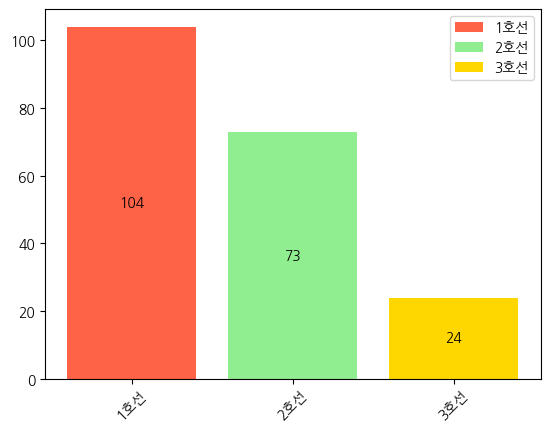

In [42]:
bar_graph=plt.bar(new_stat_depart_DF.index, new_stat_depart_DF['구분'], 
                  color=['tomato','lightgreen','gold'], label=new_stat_depart_DF.index)
plt.xticks(rotation=45)
plt.bar_label(bar_graph, new_stat_depart_DF['구분'], label_type='center')
plt.legend()
plt.show()

In [43]:
first_line

,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,서부정류장,대명,...,동촌,해안,방촌,용계,율하,신기,반야월,각산,안심,연도별 합계
2006,0,0,2281143,1582727,1349384,4116828,1588371,1573900,3815431,1168064,...,591464,1094105,1201283,576655,445903,1231694,905698,1354935,1676196,63907988
2007,0,0,2465713,1547586,1436929,4067234,1447541,1479131,3587521,1123919,...,539202,1066301,1129764,579297,429181,1152810,925874,1354156,1787132,61805150
2008,0,0,2773489,1586943,1424722,4246640,1413141,1506228,3547117,1125631,...,529693,1077972,1103070,582321,450290,1174887,963067,1416594,1919978,62638635
2009,0,0,2665873,1650061,1409125,4230009,1370744,1513779,3456724,1099017,...,524635,1032562,1072365,598439,643104,1206475,914265,1349085,1999623,61943594
2010,0,0,2682135,1728905,1401545,4307647,1524297,1490567,3440455,1062094,...,530714,1011319,1072249,625729,1043487,1325812,915855,1377314,2127512,63179072
2011,0,0,2802528,1909004,1443530,4592981,1694722,1533770,3482533,1215257,...,542586,1004162,1194816,632055,1392827,1450514,946250,1414568,2237591,66524054
2012,0,0,2867615,2085445,1458735,4728331,1741014,1527339,3486241,1320682,...,550066,1002389,1246623,638520,1542614,1465891,893370,1446247,2356738,68035710
2013,0,0,3052262,2283953,1517167,4775371,1775446,1541743,3595806,1393995,...,576638,1054134,1237581,650022,1626667,1472887,791357,1446743,2409077,69454549
2014,0,0,3048716,2360686,1513165,4687037,1743539,1485766,3615729,1430419,...,619163,1087895,1244168,630720,1712260,1473514,788099,1510190,2458177,69205305
2015,0,0,3096735,2525773,1560232,4764510,1795786,1484263,3628271,1474398,...,679314,1070567,1258274,681992,1738613,1445736,811941,1522522,2452409,69206531


In [44]:
first_line.columns

Index(['설화명곡', '화원', '대곡', '진천', '월배', '상인', '월촌', '송현', '서부정류장', '대명', '안지랑',
       '현충로', '영대병원', '교대', '명덕1', '반월당1', '중앙로', '대구역', '칠성시장', '신천', '동대구역',
       '동구청', '아양교', '동촌', '해안', '방촌', '용계', '율하', '신기', '반야월', '각산', '안심',
       '연도별 합계'],
      dtype='object')

In [45]:
stations_total=[]
for i in range(len(first_line.columns)):
    stations_total.append(first_line[first_line.columns[i]].sum())

first_line.loc['역별합계']=stations_total

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_19724\1550938563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_line.loc['역별합계']=stations_total


In [46]:
first_line

,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,서부정류장,대명,...,동촌,해안,방촌,용계,율하,신기,반야월,각산,안심,연도별 합계
2006,0,0,2281143,1582727,1349384,4116828,1588371,1573900,3815431,1168064,...,591464,1094105,1201283,576655,445903,1231694,905698,1354935,1676196,63907988
2007,0,0,2465713,1547586,1436929,4067234,1447541,1479131,3587521,1123919,...,539202,1066301,1129764,579297,429181,1152810,925874,1354156,1787132,61805150
2008,0,0,2773489,1586943,1424722,4246640,1413141,1506228,3547117,1125631,...,529693,1077972,1103070,582321,450290,1174887,963067,1416594,1919978,62638635
2009,0,0,2665873,1650061,1409125,4230009,1370744,1513779,3456724,1099017,...,524635,1032562,1072365,598439,643104,1206475,914265,1349085,1999623,61943594
2010,0,0,2682135,1728905,1401545,4307647,1524297,1490567,3440455,1062094,...,530714,1011319,1072249,625729,1043487,1325812,915855,1377314,2127512,63179072
2011,0,0,2802528,1909004,1443530,4592981,1694722,1533770,3482533,1215257,...,542586,1004162,1194816,632055,1392827,1450514,946250,1414568,2237591,66524054
2012,0,0,2867615,2085445,1458735,4728331,1741014,1527339,3486241,1320682,...,550066,1002389,1246623,638520,1542614,1465891,893370,1446247,2356738,68035710
2013,0,0,3052262,2283953,1517167,4775371,1775446,1541743,3595806,1393995,...,576638,1054134,1237581,650022,1626667,1472887,791357,1446743,2409077,69454549
2014,0,0,3048716,2360686,1513165,4687037,1743539,1485766,3615729,1430419,...,619163,1087895,1244168,630720,1712260,1473514,788099,1510190,2458177,69205305
2015,0,0,3096735,2525773,1560232,4764510,1795786,1484263,3628271,1474398,...,679314,1070567,1258274,681992,1738613,1445736,811941,1522522,2452409,69206531


In [47]:
first_line.columns

Index(['설화명곡', '화원', '대곡', '진천', '월배', '상인', '월촌', '송현', '서부정류장', '대명', '안지랑',
       '현충로', '영대병원', '교대', '명덕1', '반월당1', '중앙로', '대구역', '칠성시장', '신천', '동대구역',
       '동구청', '아양교', '동촌', '해안', '방촌', '용계', '율하', '신기', '반야월', '각산', '안심',
       '연도별 합계'],
      dtype='object')

In [48]:
second_line.columns

Index(['문양', '다사', '대실', '강창', '계명대', '성서산업단지', '이곡', '용산', '죽전', '감삼', '두류',
       '내당', '반고개', '청라언덕2', '반월당2', '경대병원', '대구은행', '범어', '수성구청', '만촌', '담티',
       '연호', '대공원', '고산', '신매', '사월', '정평', '임당', '영남대', '연도별 합계'],
      dtype='object')

In [49]:
third_line.columns

Index(['칠곡경대병원', '학정', '팔거', '동천', '칠곡운암', '구암', '태전', '매천', '매천시장', '팔달',
       '공단', '만평', '팔달시장', '원대', '북구청', '달성공원', '서문시장', '청라언덕3', '남산', '명덕3',
       '건들바위', '대봉교', '수성시장', '수성구민운동장', '어린이세상', '황금', '수성못', '지산', '범물',
       '용지', '연도별 합계'],
      dtype='object')

In [50]:
stations_total2=[]
for i in range(len(second_line.columns)):
    stations_total2.append(second_line[second_line.columns[i]].sum())

second_line.loc['역별합계']=stations_total2

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_19724\3123950451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_line.loc['역별합계']=stations_total2


In [51]:
second_line

,문양,다사,대실,강창,계명대,성서산업단지,이곡,용산,죽전,감삼,...,담티,연호,대공원,고산,신매,사월,정평,임당,영남대,연도별 합계
2006,714256,479071,431409,1311104,2569597,2046135,1434669,2711653,1680043,2032690,...,938415,140297,149190,749536,2616171,1956580,0,0,0,43808439
2007,748559,609371,480067,1406013,2560816,2086728,1382099,2762126,1670337,2157690,...,1006679,150784,181594,738945,2647971,2240735,0,0,0,45286999
2008,843485,600428,753350,1499394,2686437,2097263,1411304,2873779,1722626,2225724,...,1038045,171260,195814,801843,2597179,2623742,0,0,0,47431446
2009,854798,652987,1328450,1526047,2707690,2067932,1394957,2913282,1740792,2361482,...,1079509,170169,182204,839322,2462016,2958782,0,0,0,49433405
2010,891432,760130,1449457,1638789,2877237,2151160,1407128,3076591,1745262,2413856,...,1102825,166705,181954,862092,2434252,3108599,0,0,0,51497831
2011,969754,772528,1595523,1718339,2939182,2208514,1455236,3219414,1856343,2414378,...,1143372,181480,227746,963364,2515702,3308712,0,0,0,54177946
2012,1023005,793311,1881728,1706728,3066350,2157130,1479357,3288234,1992247,2485621,...,1230730,203312,245972,934129,2647352,2862695,388221,167335,1030158,57798909
2013,1090867,806471,2037206,1750499,3098930,2197122,1488088,3319177,2056978,2512991,...,1328467,228335,232679,981573,2842972,1712856,1456349,691529,3528143,63690252
2014,1090063,820421,2107361,1713642,3116387,2141501,1492337,3260877,2066000,2501305,...,1278048,240326,179256,958423,2811760,1624752,1532108,776090,3659440,63820918
2015,1067404,804379,2173585,1668354,3022538,2183132,1505973,3265445,2129395,2542477,...,1253737,230624,177857,915918,2773374,1617944,1517006,901034,3615663,63073340


In [52]:
stations_total3=[]
for i in range(len(third_line.columns)):
    stations_total3.append(third_line[third_line.columns[i]].sum())

third_line.loc['역별합계']=stations_total3

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_19724\3444272076.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_line.loc['역별합계']=stations_total3


In [53]:
third_line

,칠곡경대병원,학정,팔거,동천,칠곡운암,구암,태전,매천,매천시장,팔달,...,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지,연도별 합계
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015,359041,84219,1061456,469117,900593,539013,529499,461961,201049,241091,...,755472,551948,452840,331021,710787,815430,548188,917238,572935,17084977


In [54]:
new1DF=statObj.get_group('1호선')
new_station1=new1DF.groupby('역명')
new_station11=new_station1.count()

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_19724\564367631.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  new1DF=statObj.get_group('1호선')


In [55]:
new2DF=statObj.get_group('2호선')
new_station2=new2DF.groupby('역명')
new_station22=new_station2.count()

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_19724\3621025969.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  new2DF=statObj.get_group('2호선')


In [56]:
new3DF=statObj.get_group('3호선')
new_station3=new3DF.groupby('역명')
new_station33=new_station3.count()

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_19724\2701574691.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  new3DF=statObj.get_group('3호선')


In [57]:
new_station11.index

Index(['각산', '교대', '대곡(정부대구청사)', '대구', '대명', '동구청', '동촌', '명덕(2.28민주운동기념회관)',
       '반월당', '상인', '서부정류장', '설화명곡', '송현', '신기', '신천(경북대입구)', '아양교', '안지랑',
       '영대병원', '용계', '월배', '월촌', '율하', '중앙로', '진천', '칠성시장', '해안', '현충로', '화원'],
      dtype='object', name='역명')

In [58]:
new_station22.index

Index(['감삼', '강창', '경대병원', '계명대', '고산', '내당', '다사', '담티(수성대,대륜)', '대공원',
       '대구은행', '대실', '두류', '만촌', '문양', '반고개', '범어', '성서산업단지', '수성구청', '신매',
       '영남대', '용산(서부법원·검찰청입구)', '이곡', '임당', '죽전', '청라언덕'],
      dtype='object', name='역명')

In [59]:
new_station33.index

Index(['공단', '구암', '남산', '달성공원', '대봉교', '동천역', '매천', '매천시장',
       '명덕(2.28민주운동기념회관)', '북구청', '서문시장', '수성못', '어린이회관', '용지역', '청라언덕',
       '칠곡경대병원', '칠곡운암', '팔거역', '팔달', '황금'],
      dtype='object', name='역명')

In [60]:
new_station11.rename(index={'대구':'대구역', '동구청':'동구청(큰고개)', '서부정류장':'서부정류장(관문시장)'}, inplace=True)

In [61]:
new_station22.rename(index={'수성구청':'수성구청(KBS)', '담티(수성대,대륜)':'담티(산대·대륜)'}, inplace=True)

In [62]:
new_station33.rename(index={'팔거역':'팔거(국립농관원·통계청)', '동천역':'동천', '서문시장':'서문시장(동산병원)', '수성못':'수성못(TBC)', '용지역':'용지'}, 
                    inplace=True)

In [63]:
first_line.loc['역별합계'][:-1]

설화명곡       9775474
화원         9469521
대곡        44498628
진천        38678149
월배        26526824
상인        77910424
월촌        29115362
송현        25912783
서부정류장     60759880
대명        23424539
안지랑       27861422
현충로       22556402
영대병원      41260036
교대        27585889
명덕1       33610145
반월당1      70959111
중앙로      131374109
대구역       63159493
칠성시장      33302276
신천        30851127
동대구역      92538615
동구청       25973542
아양교       33731805
동촌        11831272
해안        17768552
방촌        21022058
용계        11347540
율하        23697544
신기        24150014
반야월       15802087
각산        25498913
안심        38626381
Name: 역별합계, dtype: int64

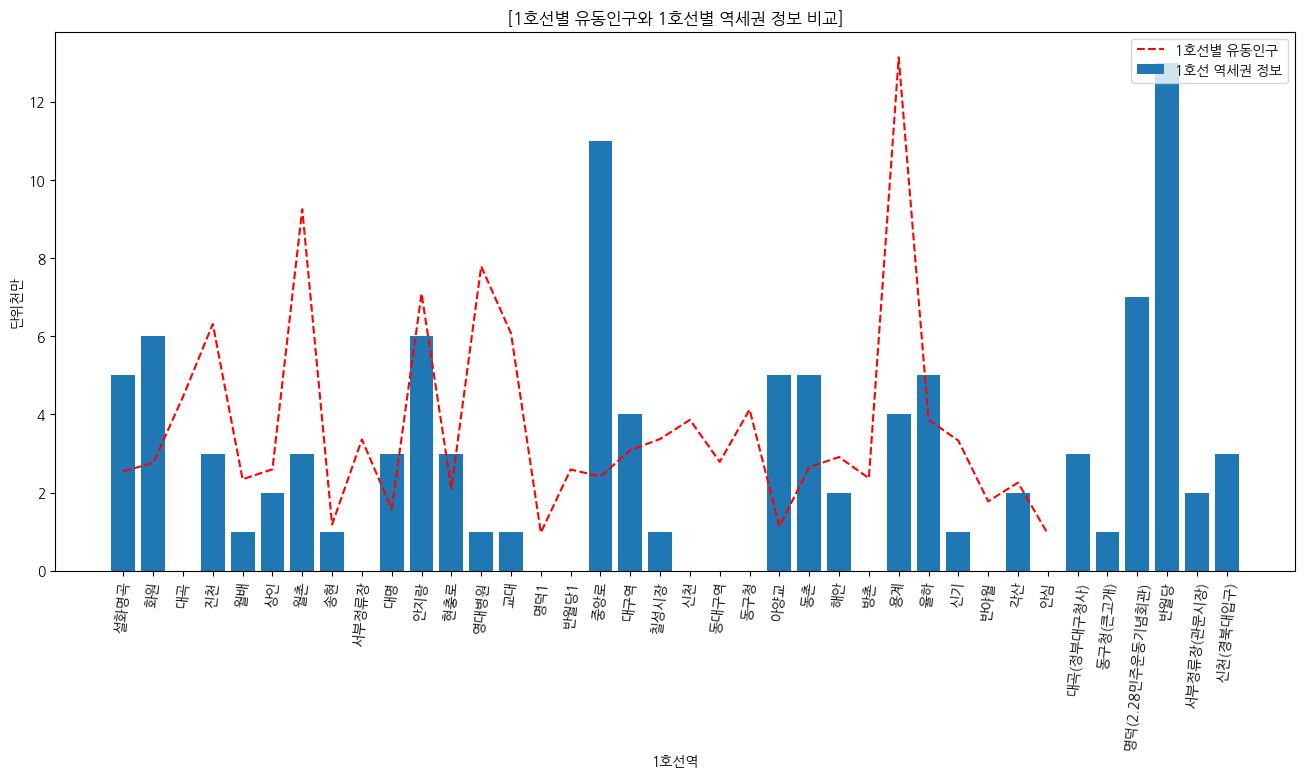

In [68]:
# 1호선별 유동인구와 1호선별 역세권 정보 비교

x1=new_station11.sort_index().index
x1=sorted(x1)
y1=new_station11.sort_index()["구분"]
r1=first_line.loc['역별합계'][:-1]/10000000
r1=r1.sort_index()
z1=first_line.columns[:-1]

plt.figure(figsize=(16,7))
plt.plot(z1, r1, 'r--', label='1호선별 유동인구')
bar_graph=plt.bar(x1, y1, label='1호선 역세권 정보')

plt.xticks(rotation=85)
plt.title('[1호선별 유동인구와 1호선별 역세권 정보 비교]')
plt.xlabel('1호선역')
plt.ylabel('단위천만')
plt.legend(loc='upper right')
plt.show()

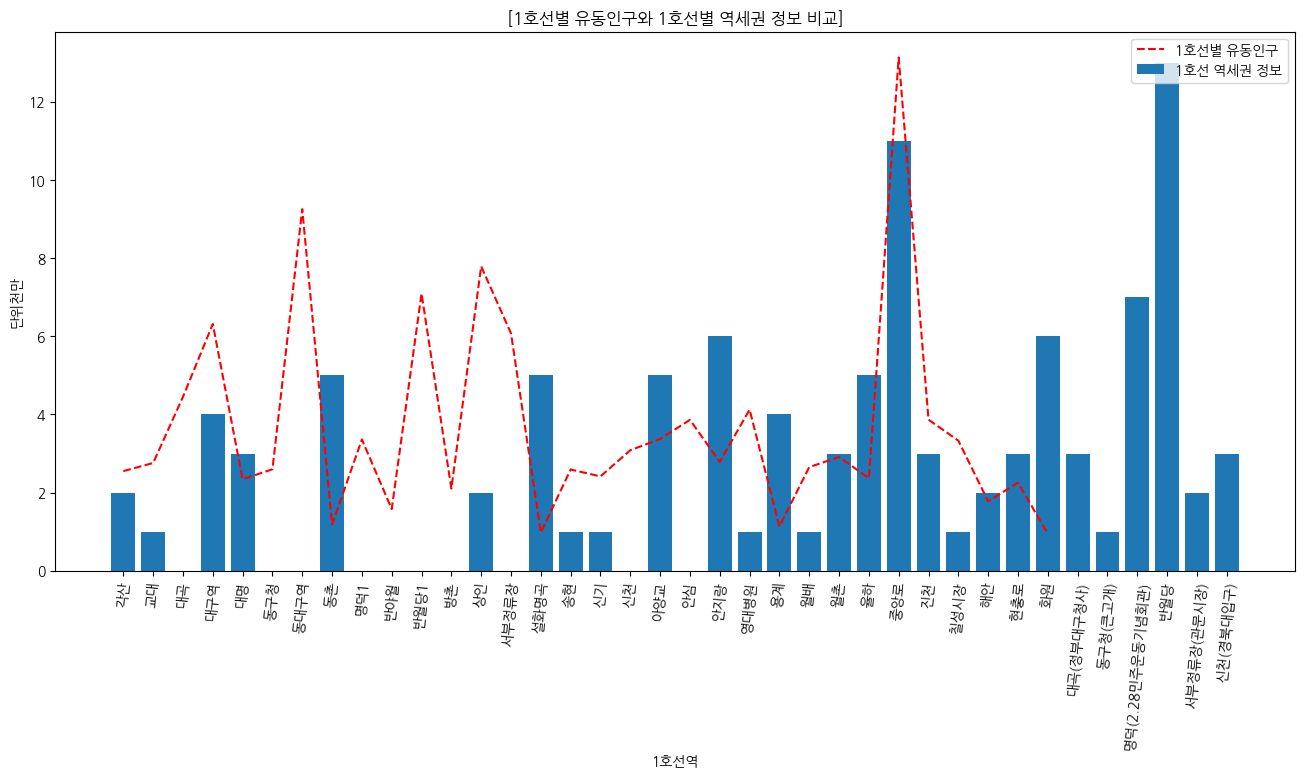

In [69]:
# 1호선별 유동인구와 1호선별 역세권 정보 비교
x1=new_station11.sort_index().index
x1=sorted(x1)
y1=new_station11.sort_index()["구분"]
r1=first_line.loc['역별합계'][:-1]/10000000
r1=r1.sort_index()

plt.figure(figsize=(16,7))
plt.plot(r1, 'r--', label='1호선별 유동인구')
bar_graph=plt.bar(x1, y1, label='1호선 역세권 정보')

plt.xticks(rotation=85)
plt.title('[1호선별 유동인구와 1호선별 역세권 정보 비교]')
plt.xlabel('1호선역')
plt.ylabel('단위천만')
plt.legend(loc='upper right')
plt.show()

In [ ]:
new2DF=statObj.get_group('2호선')
new_station2=new2DF.groupby('역명')
new_station2=new_station2.count()

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_2364\3789177585.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  new2DF=statObj.get_group('2호선')


In [ ]:
new_station2.index

Index(['감삼', '강창', '경대병원', '계명대', '고산', '내당', '다사', '담티(수성대,대륜)', '대공원',
       '대구은행', '대실', '두류', '만촌', '문양', '반고개', '범어', '성서산업단지', '수성구청', '신매',
       '영남대', '용산(서부법원·검찰청입구)', '이곡', '임당', '죽전', '청라언덕'],
      dtype='object', name='역명')

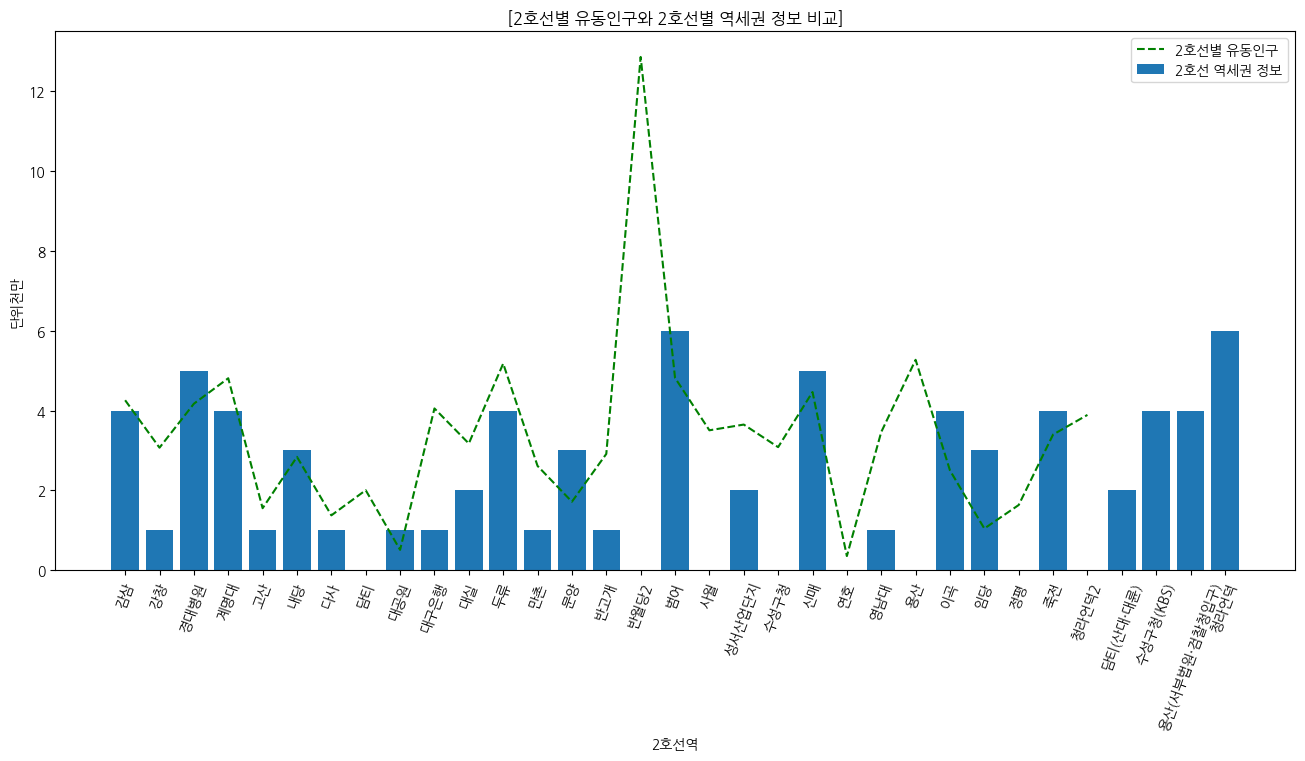

In [71]:
# 2호선별 유동인구와 2호선별 역세권 정보 비교
x2=new_station22.sort_index().index
x2=sorted(x2)
y2=new_station22.sort_index()["구분"]
r2=second_line.loc['역별합계'][:-1]/10000000
r2=r2.sort_index()

plt.figure(figsize=(16,7))
plt.plot(r2, 'g--', label='2호선별 유동인구')
bar_graph=plt.bar(x2, y2, label='2호선 역세권 정보')
plt.xticks(rotation=70)
plt.title('[2호선별 유동인구와 2호선별 역세권 정보 비교]')
plt.xlabel('2호선역')
plt.ylabel('단위천만')
plt.legend(loc='upper right')
plt.show()

In [ ]:
new3DF=statObj.get_group('3호선')
new_station3=new3DF.groupby('역명')
new_station3=new_station3.count()

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_2364\2971982420.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  new3DF=statObj.get_group('3호선')


In [ ]:
third_line.loc['역별합계'][:-1]/10000000

칠곡경대병원     0.374948
학정         0.101358
팔거         1.341816
동천         0.579701
칠곡운암       1.159800
구암         0.682384
태전         0.668355
매천         0.605398
매천시장       0.345746
팔달         0.349946
공단         0.345528
만평         0.501275
팔달시장       0.702573
원대         0.453916
북구청        1.070962
달성공원       0.498592
서문시장       2.181793
청라언덕3      0.525474
남산         0.951474
명덕3        0.824279
건들바위       0.398745
대봉교        0.895413
수성시장       0.800912
수성구민운동장    0.559551
어린이세상      0.363372
황금         0.914339
수성못        0.801684
지산         0.665433
범물         1.182837
용지         0.672164
Name: 역별합계, dtype: float64

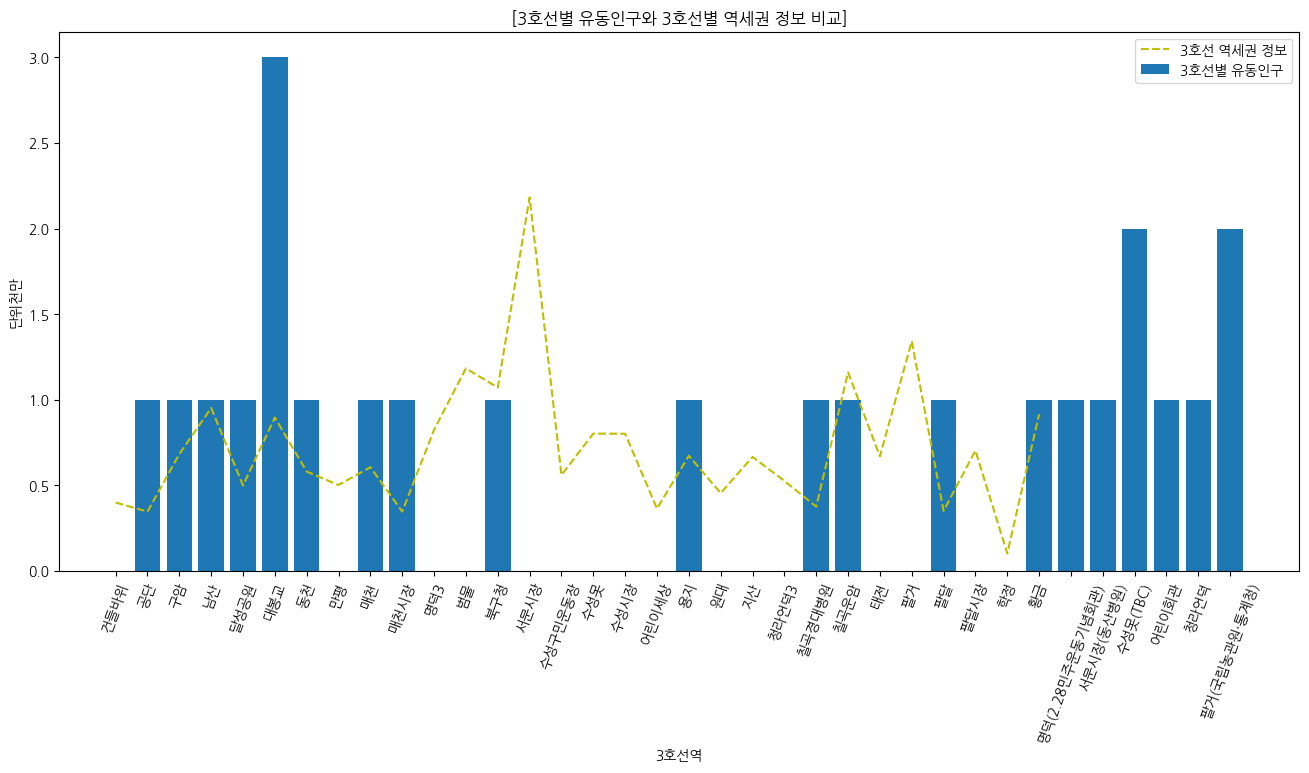

In [77]:
# 3호선별 유동인구와 3호선별 역세권 정보 비교
x3=new_station33.sort_index().index
x3=sorted(x3)
y3=new_station33.sort_index()["구분"]
r3=third_line.loc['역별합계'][:-1]/10000000
r3=r3.sort_index()

plt.figure(figsize=(16,7))
plt.plot(r3, 'y--', label='3호선 역세권 정보')
bar_graph=plt.bar(x3, y3, label='3호선별 유동인구')
plt.xticks(rotation=70)
plt.title('[3호선별 유동인구와 3호선별 역세권 정보 비교]')
plt.xlabel('3호선역')
plt.ylabel('단위천만')
plt.legend(loc='upper right')
plt.show()

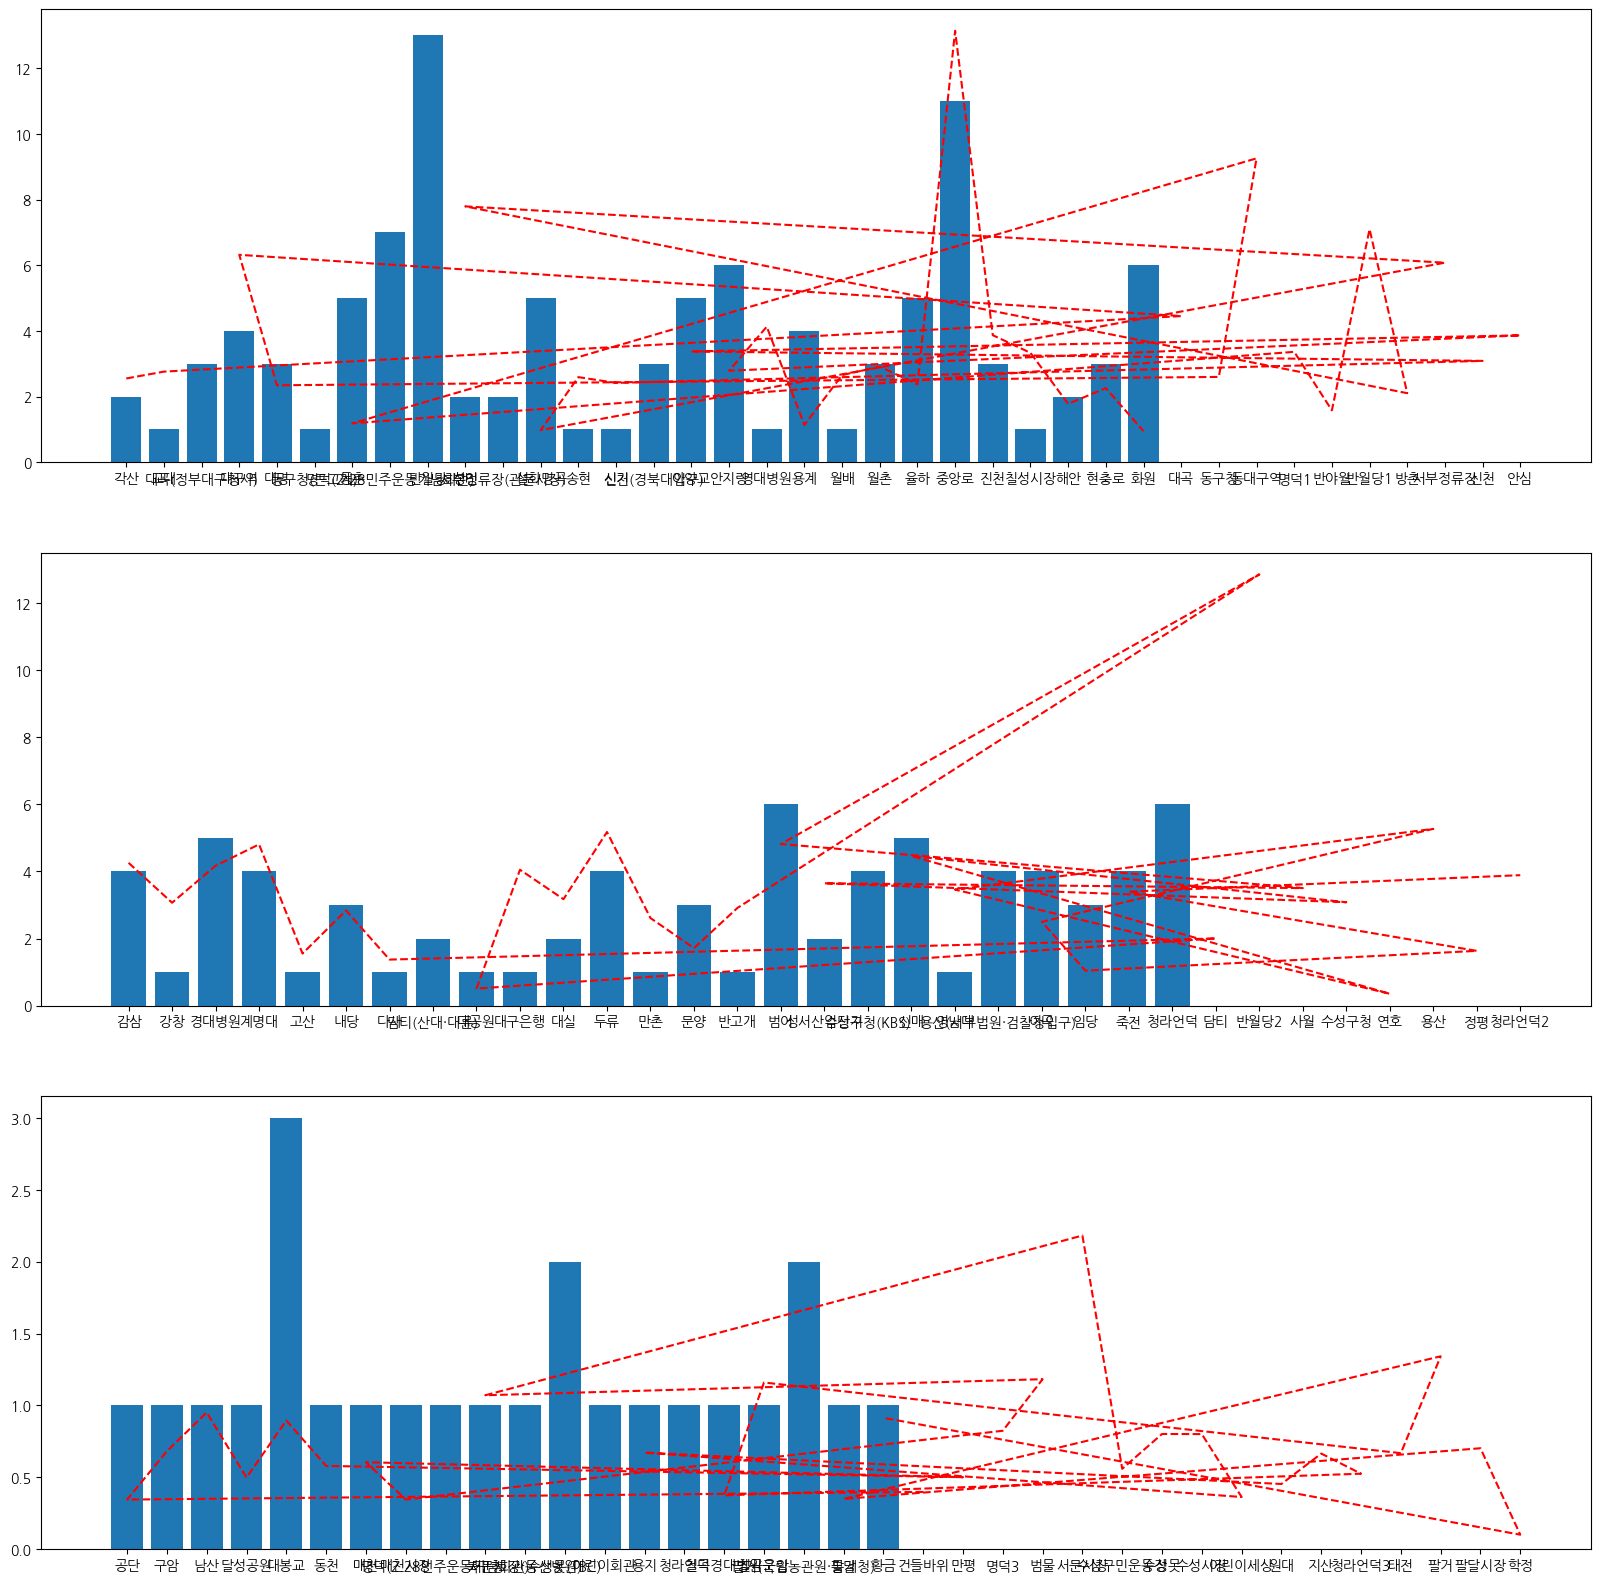

In [ ]:
# subplots로 묶기
xlist=[x1,x2,x3]
ylist=[y1,y2,y3]
rlist=[r1,r2,r3]

# - (1) 그래프 담을 창 생성
fig=plt.figure(figsize=[20,20])

# - (2) 그래프 담을 공간 생성 axes
axes = fig.subplots(3,1)

for idx, ax in enumerate(axes):
    ax.bar(xlist[idx], ylist[idx])
    ax.plot(rlist[idx], 'r--')

    # ax.set_xticks(rotation=45)

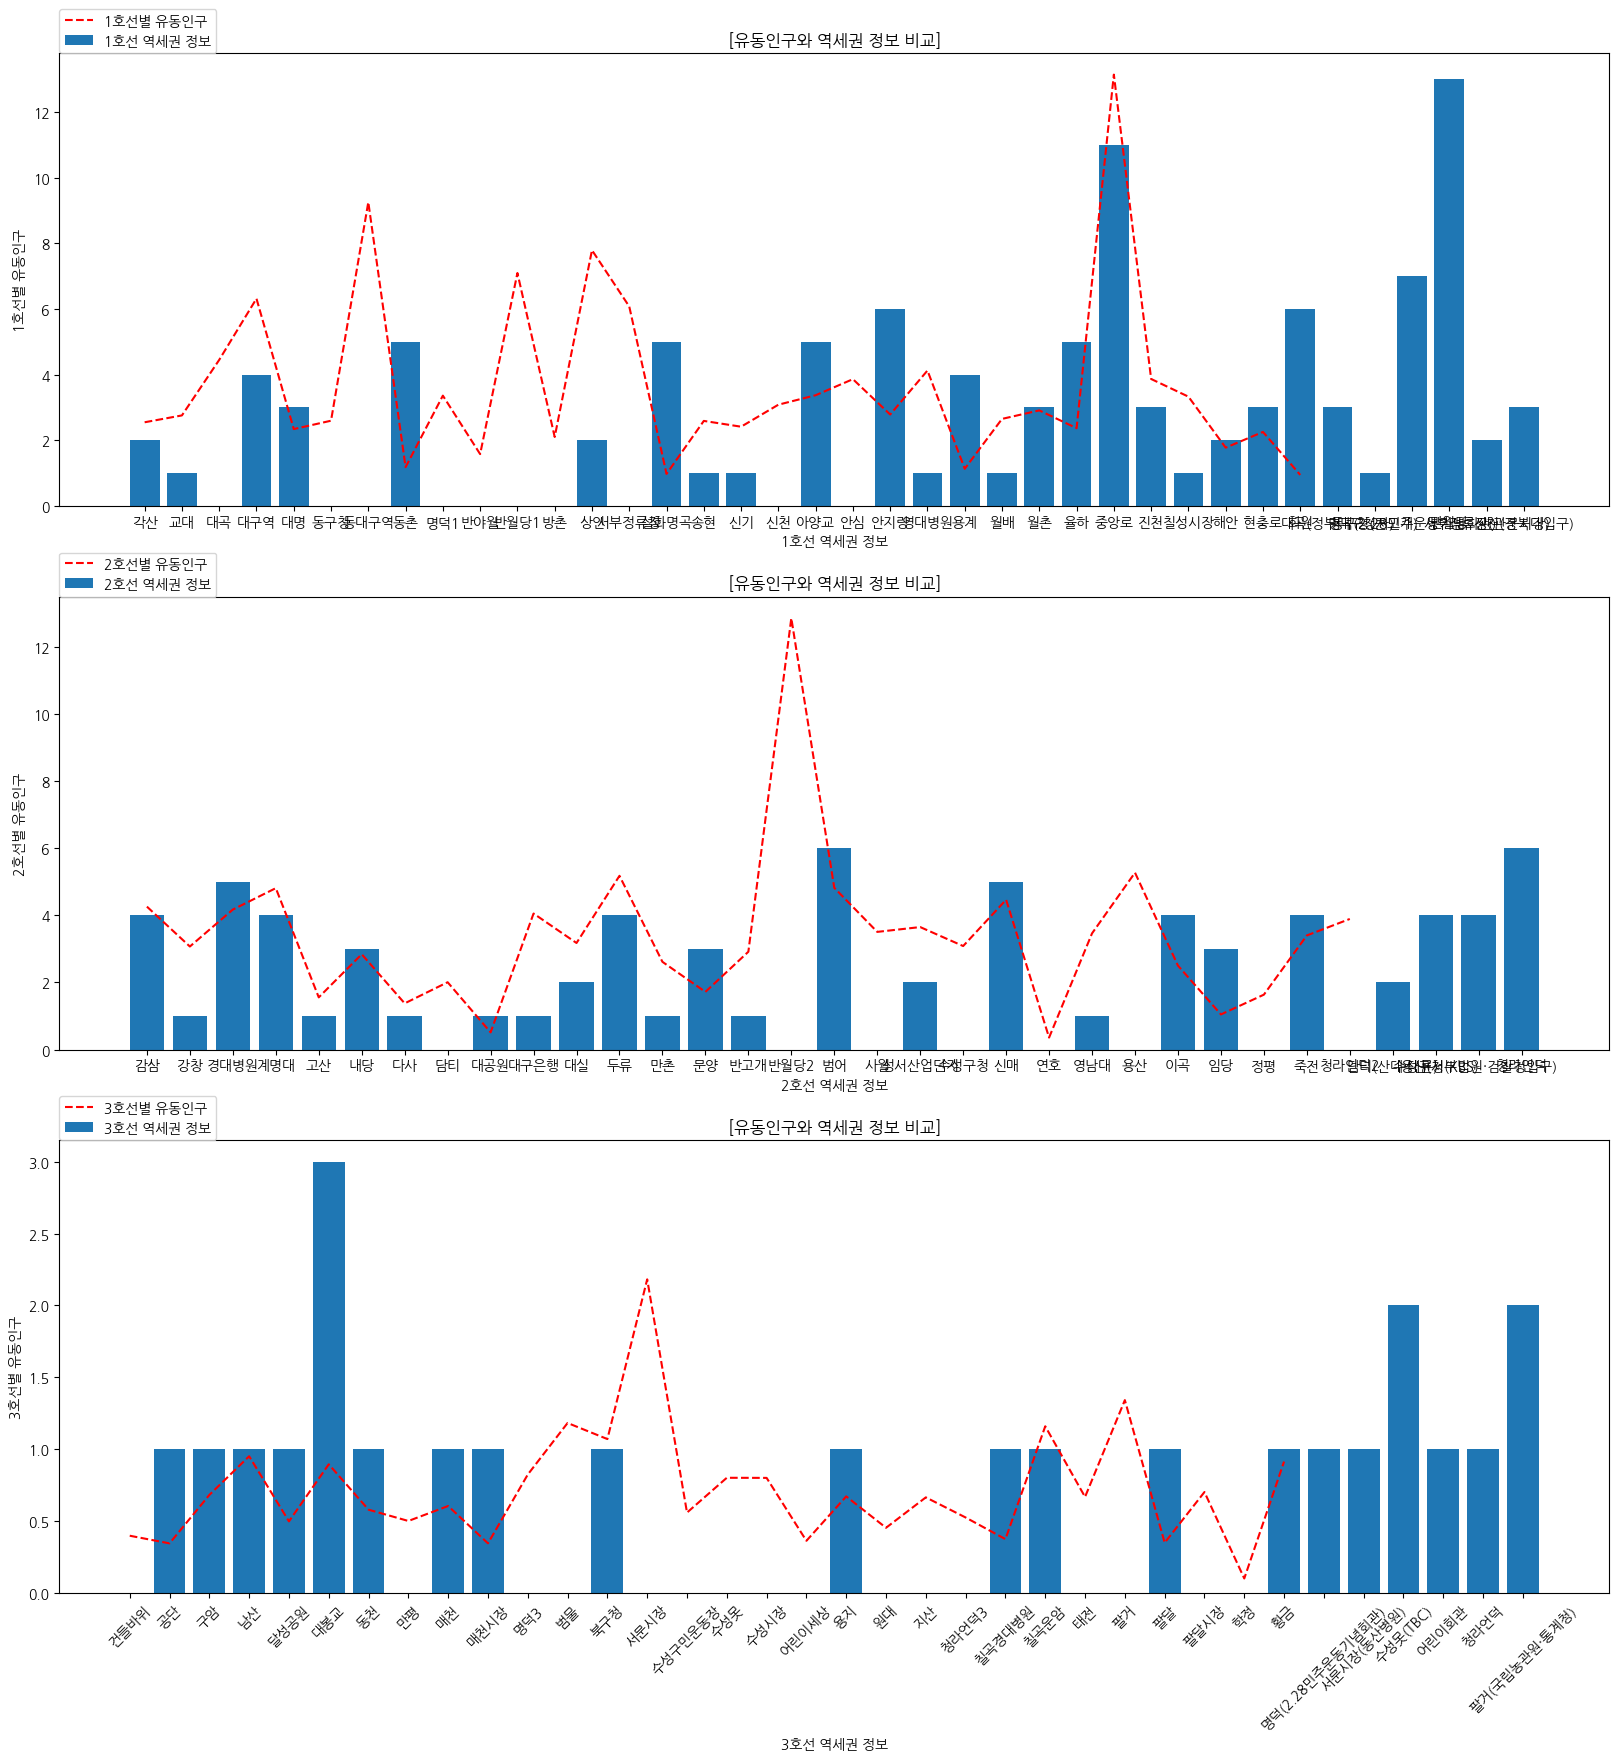

In [76]:
# subplots로 묶기
xlist=[x1,x2,x3]
ylist=[y1,y2,y3]
rlist=[r1,r2,r3]
# colors=['r--','g--','y--']
people=['1호선 역세권 정보', '2호선 역세권 정보', '3호선 역세권 정보']
stations=['1호선별 유동인구', '2호선별 유동인구', '3호선별 유동인구']
bar_labels=['1호선 역세권 정보', '2호선 역세권 정보', '3호선 역세권 정보']
plot_labels=['1호선별 유동인구', '2호선별 유동인구', '3호선별 유동인구']

# - (1) 그래프 담을 창 생성
fig=plt.figure(figsize=[20,20])

# - (2) 그래프 담을 공간 생성 axes
axes = fig.subplots(3,1)

for idx, ax in enumerate(axes):
    ax.plot(rlist[idx], 'r--', label=plot_labels[idx])

for idx, ax in enumerate(axes):
    ax.bar(xlist[idx], ylist[idx], label=bar_labels[idx])
    # ax.xticks(rotation=45)
    ax.set_title('[유동인구와 역세권 정보 비교]')
    ax.set_xlabel(people[idx])
    ax.set_ylabel(stations[idx])
    ax.legend(loc=[0,1])

plt.xticks(rotation=45)
plt.show()